In [1]:
import pandas as pd
import spacy
from sklearn import model_selection
import numpy as np


from tensorflow import keras
from tensorflow.keras import layers, models

In [2]:
df = pd.read_json(open("../data/data.json", "r", encoding="utf8"))
df.head()

,title,url,author,year,text,themes
0,"[30, 419, 145, 978]",https://poets.org/poem/body-and-soul-ii,401,2002,"[2104, 1237, 2, 2104, 252, 830, 137, 483, 54, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,[3112],https://poets.org/poem/novel,222,2002,"[288, 3496, 1, 2337, 238, 17, 1164, 633, 427, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,[169],https://poets.org/poem/flying,2263,2002,"[13, 620, 9, 1559, 192, 106, 433, 11, 2338, 21...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[1345, 3162, 95, 292, 1003, 2815]",https://poets.org/poem/photograph-people-danci...,1528,2002,"[245, 16, 23, 5, 5, 29, 1034, 1579, 3199, 50, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[2673, 358]",https://poets.org/poem/borrowed-dress,371,2001,"[19, 107, 4188, 4726, 29, 581, 2967, 1659, 587...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


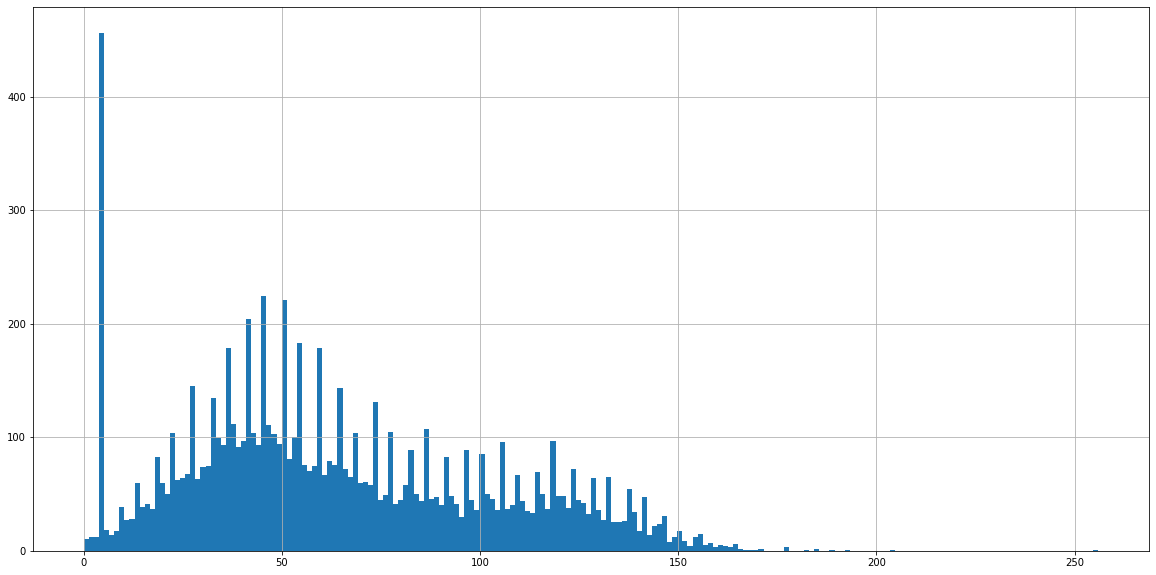

In [3]:
texts_len = df['text'].apply(len)
texts_len.hist(bins=200, figsize=(20, 10))

In [4]:
texts_len = df['text'].apply(len)
df.drop(df[texts_len<50].index, inplace=True)
#a_dataframe.drop(a_dataframe[a_dataframe.B > 3].index, inplace=True)

In [5]:
max_features = 5000  # maximum number of words in vocabulari 5000
max_len = 150  # max length of string
output_dim =100 

In [6]:
X = keras.preprocessing.sequence.pad_sequences(list(df['text']), maxlen=max_len, padding='post')
Y = np.array(df['themes'].to_list())

In [7]:
df.head()

,title,url,author,year,text,themes
0,"[30, 419, 145, 978]",https://poets.org/poem/body-and-soul-ii,401,2002,"[2104, 1237, 2, 2104, 252, 830, 137, 483, 54, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,[3112],https://poets.org/poem/novel,222,2002,"[288, 3496, 1, 2337, 238, 17, 1164, 633, 427, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,[169],https://poets.org/poem/flying,2263,2002,"[13, 620, 9, 1559, 192, 106, 433, 11, 2338, 21...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[1345, 3162, 95, 292, 1003, 2815]",https://poets.org/poem/photograph-people-danci...,1528,2002,"[245, 16, 23, 5, 5, 29, 1034, 1579, 3199, 50, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[2673, 358]",https://poets.org/poem/borrowed-dress,371,2001,"[19, 107, 4188, 4726, 29, 581, 2967, 1659, 587...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [8]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
model = keras.Sequential([
    layers.Embedding(max_features, output_dim, input_length=max_len),
    layers.SpatialDropout1D(0.2),
    layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    layers.Dense(153, activation='softmax')
])

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
epochs = 5
batch_size = 128

early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[early_stopping_callback])

Epoch 1/5
28/28 [==============================] - 6s 208ms/step - loss: 9.6440 - accuracy: 0.1146 - val_loss: 9.7061 - val_accuracy: 0.1788
Epoch 2/5
28/28 [==============================] - 5s 189ms/step - loss: 9.2602 - accuracy: 0.1281 - val_loss: 9.7494 - val_accuracy: 0.1788
Epoch 3/5
28/28 [==============================] - 5s 192ms/step - loss: 9.2822 - accuracy: 0.1281 - val_loss: 9.7714 - val_accuracy: 0.1788
Epoch 4/5
28/28 [==============================] - 5s 184ms/step - loss: 9.3157 - accuracy: 0.1281 - val_loss: 9.8453 - val_accuracy: 0.1788


In [12]:
result = model.predict(X_test[8])

In [13]:
result

array([[0.00657617, 0.00679536, 0.0066459 , ..., 0.0062066 , 0.00621996,
        0.00647593],
       [0.00661888, 0.006893  , 0.0067419 , ..., 0.00613602, 0.00618355,
        0.00643473],
       [0.00662678, 0.00694303, 0.0067132 , ..., 0.00597954, 0.00592299,
        0.00643727],
       ...,
       [0.00699296, 0.00739812, 0.00690947, ..., 0.00525111, 0.00516508,
        0.00619545],
       [0.00699296, 0.00739812, 0.00690947, ..., 0.00525111, 0.00516508,
        0.00619545],
       [0.00699296, 0.00739812, 0.00690947, ..., 0.00525111, 0.00516508,
        0.00619545]], dtype=float32)

In [14]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

31/31 [==============================] - 0s 14ms/step - loss: 9.5587 - accuracy: 0.1399
Test set
  Loss: 9.559
  Accuracy: 0.140


In [15]:
X_test[7]

array([ 162,    5,   75,   68,    5,  214,  372, 1011,  543,  217,   17,
        225,  409,    2,   63,  792,  214,  317,   33,  111,  123,    1,
        334, 1290,  130,   27,   31,  186,  212,   81,  264,  119, 1011,
        315, 1852,   13,    5,  203,  401,  323, 1526,    1, 1294,    5,
        723,  623,  790,  401,  787,  255,  110,    4,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0], d

In [16]:
inputs = keras.Input(shape=(None,), dtype="int64")

# Next, we add a layer to map those vocab indices into a space of dimensionality
# 'embedding_dim'.
x = layers.Embedding(max_features, output_dim)(inputs)
x = layers.Dropout(0.5)(x)

# Conv1D + global max pooling
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = layers.GlobalMaxPooling1D()(x)

# We add a vanilla hidden layer:
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)

predictions = layers.Dense(153, activation='softmax', name="predictions")(x)

model2 = keras.Model(inputs, predictions)

# Compile the model with binary crossentropy loss and an adam optimizer.
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [17]:
model2.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Epoch 1/5
28/28 [==============================] - 1s 48ms/step - loss: 0.0704 - accuracy: 0.0875 - val_loss: 0.0693 - val_accuracy: 0.1788
Epoch 2/5
28/28 [==============================] - 1s 41ms/step - loss: 0.0668 - accuracy: 0.1114 - val_loss: 0.0683 - val_accuracy: 0.1788
Epoch 3/5
28/28 [==============================] - 1s 53ms/step - loss: 0.0661 - accuracy: 0.1195 - val_loss: 0.0681 - val_accuracy: 0.1788
Epoch 4/5
28/28 [==============================] - 1s 48ms/step - loss: 0.0656 - accuracy: 0.1247 - val_loss: 0.0679 - val_accuracy: 0.1788
Epoch 5/5
28/28 [==============================] - 1s 48ms/step - loss: 0.0652 - accuracy: 0.1253 - val_loss: 0.0679 - val_accuracy: 0.1788


In [18]:
accr = model2.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

31/31 [==============================] - 0s 5ms/step - loss: 0.0660 - accuracy: 0.1399
Test set
  Loss: 0.066
  Accuracy: 0.140
